## Classification Introvert and Extrovert Behavior

## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [2]:
df = pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## 3. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [4]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [5]:
df.shape

(2900, 8)

In [6]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [8]:
df.duplicated().sum()

388

In [9]:
df.nunique()

Time_spent_Alone             12
Stage_fear                    2
Social_event_attendance      11
Going_outside                 8
Drained_after_socializing     2
Friends_circle_size          16
Post_frequency               11
Personality                   2
dtype: int64

In [10]:
blue_palette = ['#1f77b4', '#6baed6', '#9ecae1', '#c6dbef']

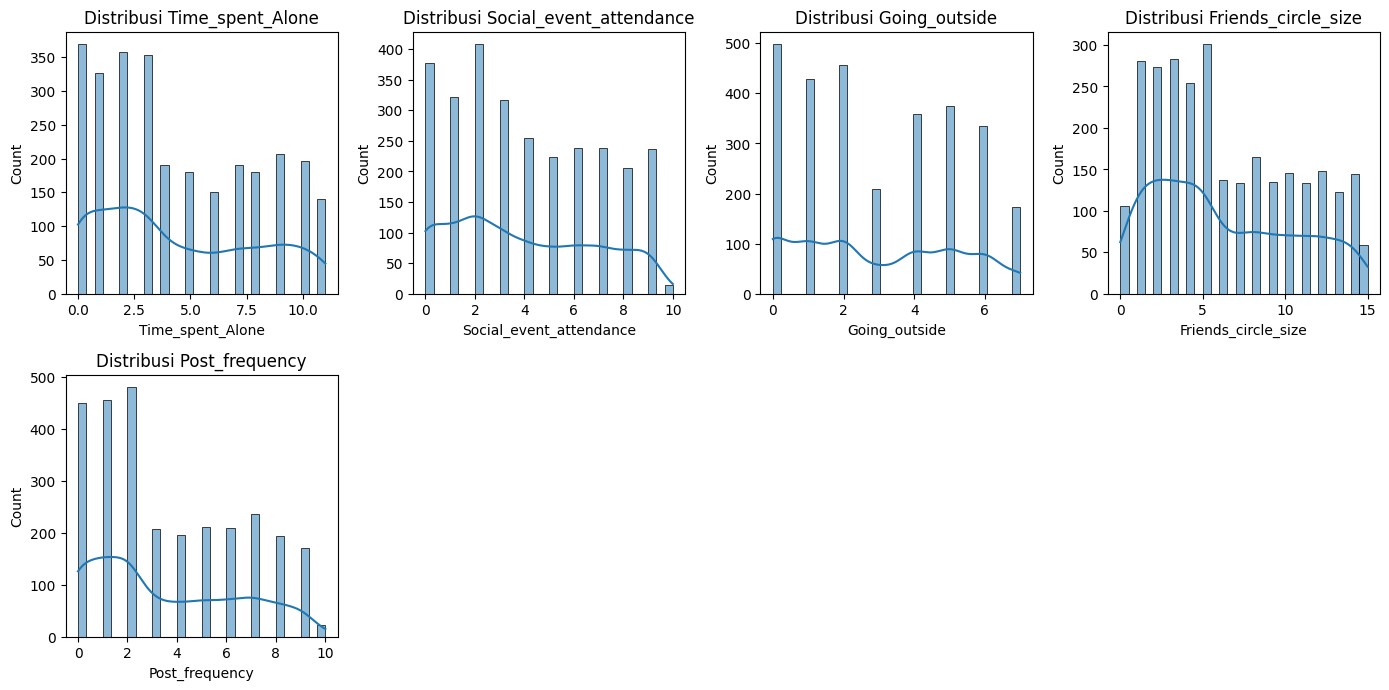

In [11]:
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='#1f77b4')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

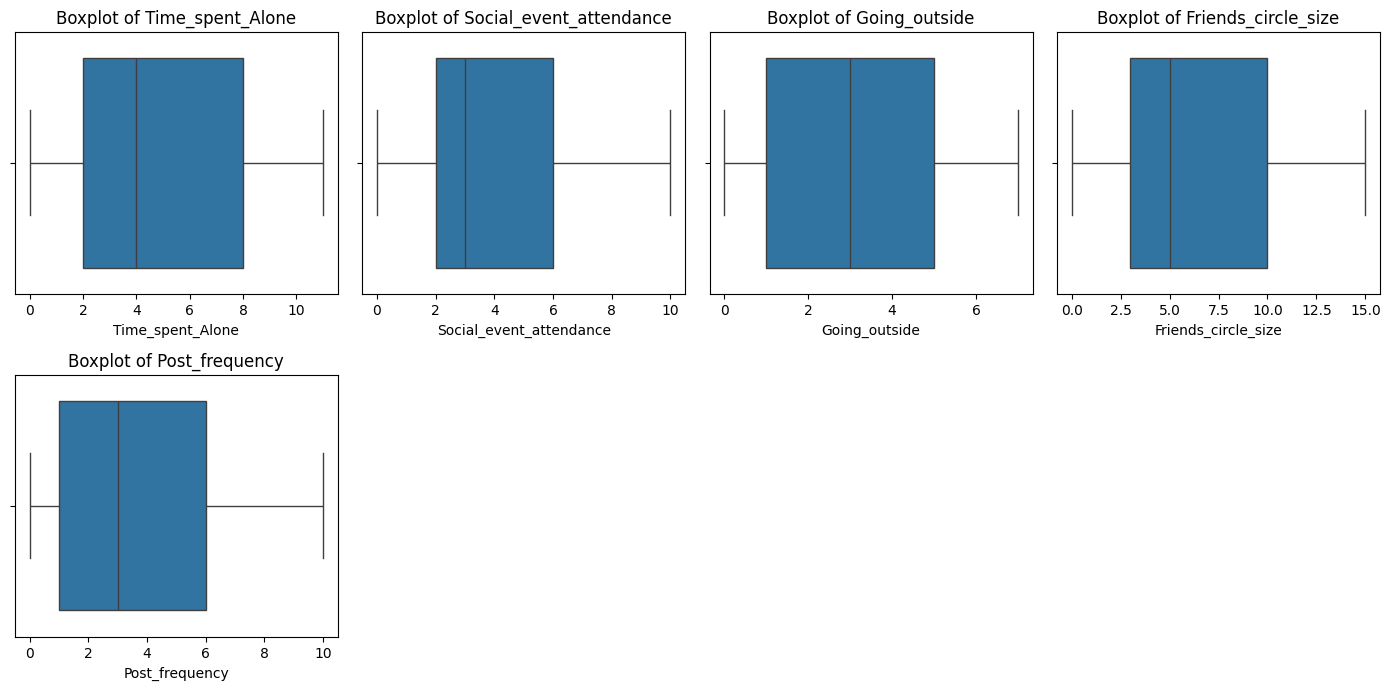

In [12]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x = df[column], color='#1f77b4')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

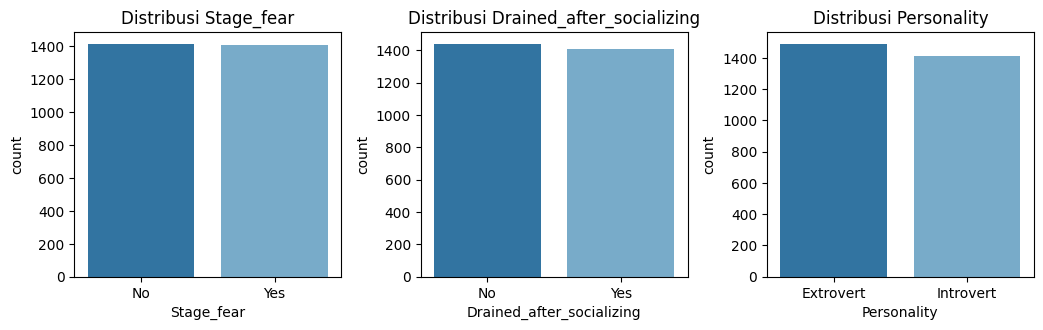

In [13]:
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 6))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=df[column], palette=blue_palette)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

### Conculsion


*   Terdapat missing value pada setiap kolomnya
*   Terdapat duplikasi data
*   Distribusi data numerik terlihat membentuk distribusi normal
*   Tidak ada outlier pada data numerik
*   Tidak ada anomali pada nilai unik data kategorikal








## 4. Data Cleaning

In [14]:
num_features = df.select_dtypes(include=[np.number])

cat_features = df.select_dtypes(include=[object])

for column in num_features.columns:
    df[column] = df[column].fillna(df[column].median())

for column in cat_features.columns:
    df[column] = df[column].fillna(df[column].mode()[0])

df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [15]:
df.duplicated().sum()

448

In [16]:
df.drop_duplicates(inplace=True)

## 5. Data Vizualization

Stage Fear of Introvert
Stage_fear
Yes    0.9
No     0.1
Name: proportion, dtype: float64

Stage Fear of Extrovert
Stage_fear
No     0.92
Yes    0.08
Name: proportion, dtype: float64


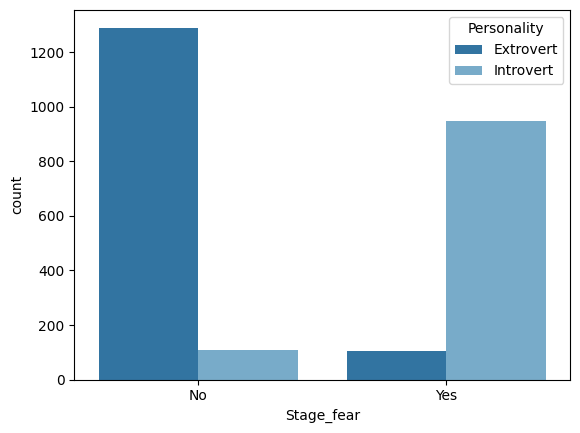

In [17]:
Introvert_stage = df[df['Personality'] == 'Introvert']
Extrovert_stage = df[df['Personality'] == 'Extrovert']

print('Stage Fear of Introvert')
print(Introvert_stage['Stage_fear'].value_counts(normalize=True).round(2))
print()
print('Stage Fear of Extrovert')
print(Extrovert_stage['Stage_fear'].value_counts(normalize=True).round(2))

sns.countplot(x = 'Stage_fear', data = df, hue='Personality', palette=blue_palette)
plt.show()

**Insight:**
- Proposi Ketakutan Panggung lebih tinggi pada orang Introvert dibanding orang extrovert
- Orang extrovert kebanyakan tidak mengalami ketakutan panggung

Drained after socialising of Introvert
Drained_after_socializing
Yes    0.89
No     0.11
Name: proportion, dtype: float64

Drained after socialising of Extrovert
Drained_after_socializing
No     0.92
Yes    0.08
Name: proportion, dtype: float64


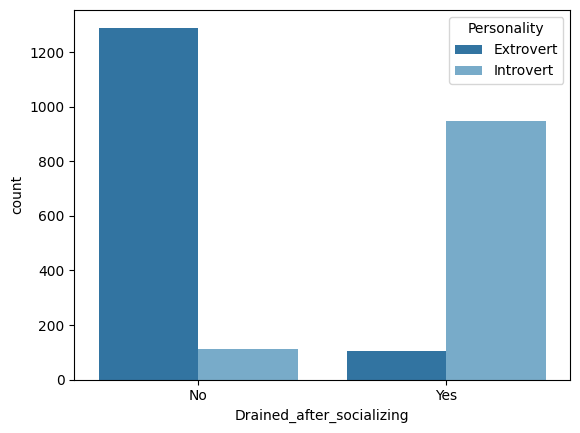

In [18]:
Introvert_drain = df[df['Personality'] == 'Introvert']
Extrovert_drain = df[df['Personality'] == 'Extrovert']

print('Drained after socialising of Introvert')
print(Introvert_drain['Drained_after_socializing'].value_counts(normalize=True).round(2))
print()
print('Drained after socialising of Extrovert')
print(Extrovert_drain['Drained_after_socializing'].value_counts(normalize=True).round(2))

sns.countplot(x = 'Drained_after_socializing', data = df, hue='Personality', palette=blue_palette)
plt.show()

**Insight :**
- Mayoritas orang introvert merasa lelah setelah bersosialisasi, dibanding orang extrovert

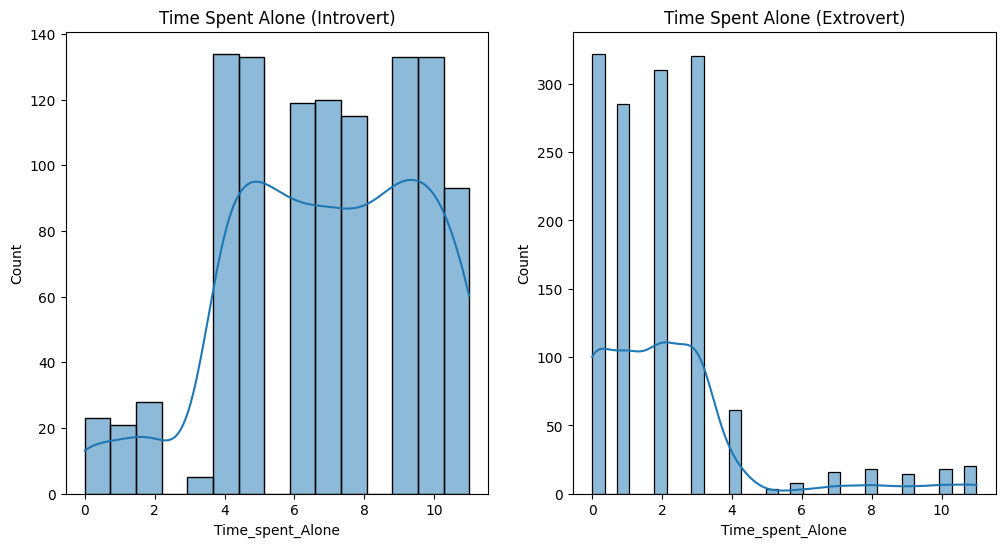

In [19]:
introvert_timespentalone = df[df['Personality'] == 'Introvert']
extrovert_timespentalone = df[df['Personality'] == 'Extrovert']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(introvert_timespentalone['Time_spent_Alone'], kde=True, label='Introvert', color='#1f77b4')
plt.title('Time Spent Alone (Introvert)')

plt.subplot(1, 2, 2)
sns.histplot(extrovert_timespentalone['Time_spent_Alone'], kde=True, label='Extrovert', color='#1f77b4')
plt.title('Time Spent Alone (Extrovert)')

plt.show()

**Insight :**
- Orang Introvert cenderung menghabiskan waktu sendirian lebih lama
- Orang Extrovert cenderung memiliki waktu sendirian yang singkat

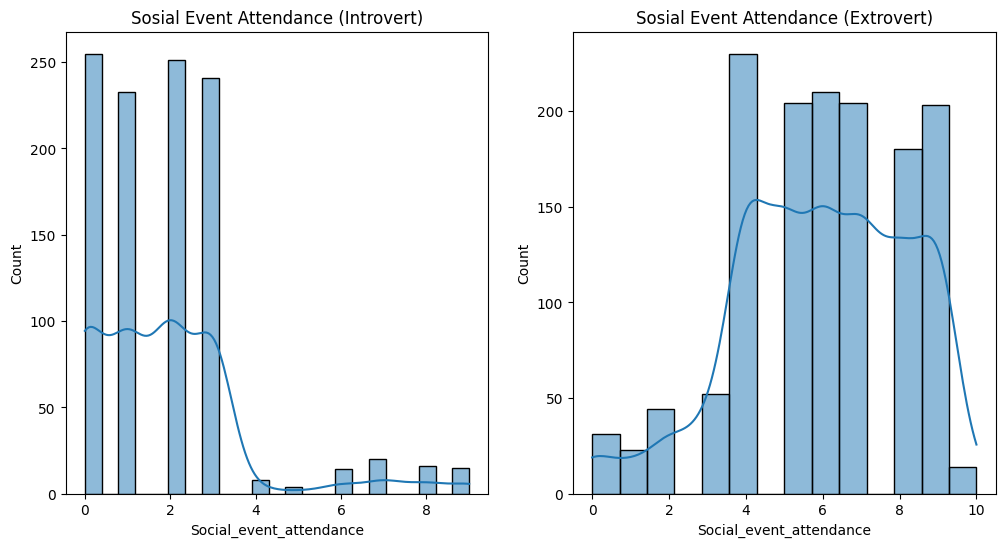

In [20]:
introvert_social = df[df['Personality'] == 'Introvert']
extrovert_social = df[df['Personality'] == 'Extrovert']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(introvert_social['Social_event_attendance'], kde=True, label='Introvert', color='#1f77b4')
plt.title('Sosial Event Attendance (Introvert)')

plt.subplot(1, 2, 2)
sns.histplot(extrovert_social['Social_event_attendance'], kde=True, label='Extrovert', color='#1f77b4')
plt.title('Sosial Event Attendance (Extrovert)')

plt.show()

**Insight :**
- Orang Introvert memiliki frekuensi rendah dalam menghadiri acara sosial
- Orang Extrovert memiliki frekuensi tinggi dalam menghadiri acara sosial

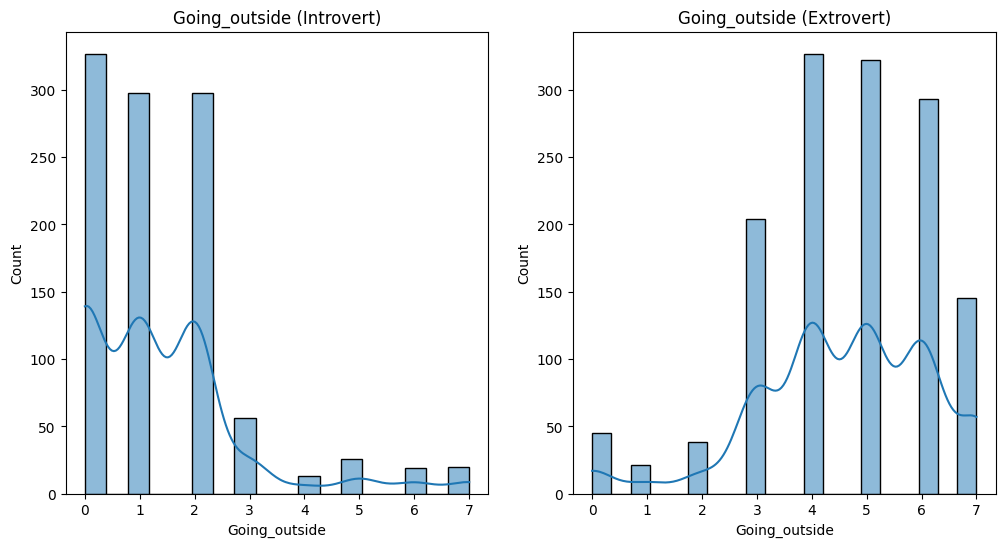

In [21]:
introvert_outside = df[df['Personality'] == 'Introvert']
extrovert_outside = df[df['Personality'] == 'Extrovert']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(introvert_outside['Going_outside'], kde=True, color='#1f77b4', label='Introvert')
plt.title('Going_outside (Introvert)')

plt.subplot(1, 2, 2)
sns.histplot(extrovert_outside['Going_outside'], kde=True, color='#1f77b4', label='Extrovert')
plt.title('Going_outside (Extrovert)')

plt.show()

**Insight:**
- Introvert cenderung jarang keluar rumah.
- Extrovert memiliki intensitas lebih tinggi untuk keluar rumah.

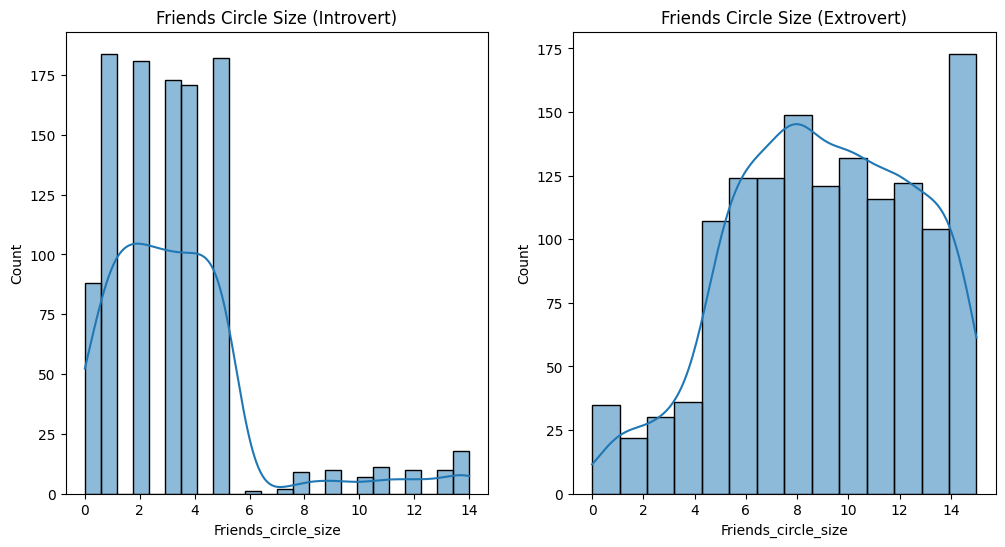

In [22]:
introvert_timespentalone = df[df['Personality'] == 'Introvert']
extrovert_timespentalone = df[df['Personality'] == 'Extrovert']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(introvert_timespentalone['Friends_circle_size'], kde=True, color='#1f77b4', label='Introvert')
plt.title('Friends Circle Size (Introvert)')

plt.subplot(1, 2, 2)
sns.histplot(extrovert_timespentalone['Friends_circle_size'], kde=True, color='#1f77b4', label='Extrovert')
plt.title('Friends Circle Size (Extrovert)')

plt.show()

**Insight**
- Introvert memiliki lingkaran pertemanan yang relatif kecil
- Extrovert cenderung memiliki lingkaran pertemanan yang lebih besar

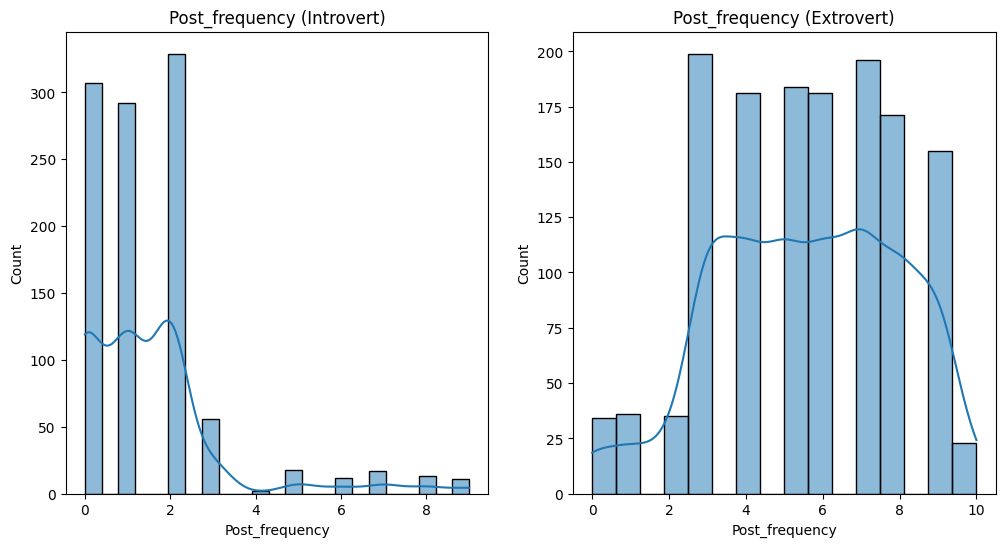

In [23]:
introvert_timespentalone = df[df['Personality'] == 'Introvert']
extrovert_timespentalone = df[df['Personality'] == 'Extrovert']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(introvert_timespentalone['Post_frequency'], kde=True, color='#1f77b4', label='Introvert')
plt.title('Post_frequency (Introvert)')

plt.subplot(1, 2, 2)
sns.histplot(extrovert_timespentalone['Post_frequency'], kde=True, color='#1f77b4', label='Extrovert')
plt.title('Post_frequency (Extrovert)')

plt.show()

**Insight:**
- Orang Introvert memiliki frekuensi yang rendah dalam posting di sosial media
- Orang Extrovert memiliki frekuensi yang tinggi dalam posting di sosial media 

### Conculsion

Berdasarkan analisis visualisasi, terdapat pola yang konsisten antara variabel perilaku sosial dan tipe kepribadian. Introvert cenderung menghabiskan waktu sendirian lebih lama, jarang menghadiri acara sosial, jarang keluar rumah, memiliki lingkaran pertemanan yang lebih kecil, dan lebih jarang memposting di media sosial. Mereka juga lebih sering mengalami stage fear dan merasa lelah setelah bersosialisasi.

Sebaliknya, Extrovert cenderung memiliki waktu sendirian yang singkat, lebih sering menghadiri acara sosial, lebih aktif keluar rumah, memiliki lingkaran pertemanan yang lebih besar, dan lebih aktif memposting di media sosial. Mereka jarang mengalami stage fear dan umumnya tidak merasa lelah setelah bersosialisasi.

## 6. Data Preprocessing

In [24]:
# Encoding Categorical Variables
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].map({'Introvert': 1, 'Extrovert': 0})

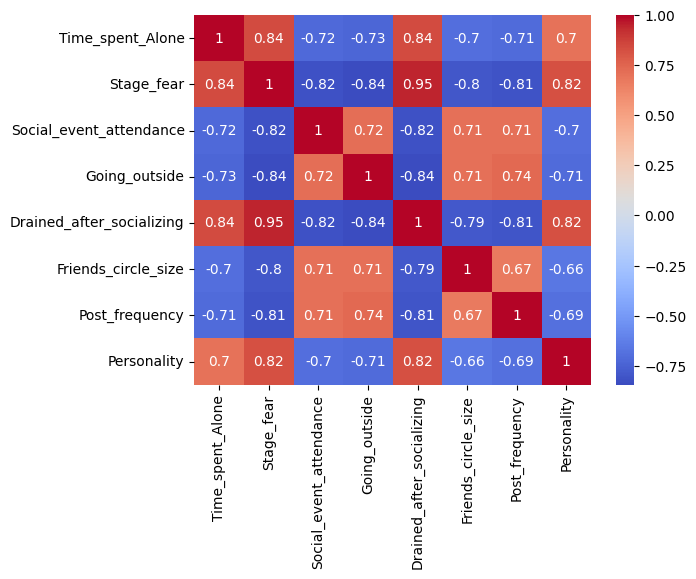

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [26]:
# Split Data X dan y
X = df.drop('Personality', axis=1)
y = df['Personality']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Modeling

### Support Vector Machine

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       275
           1       0.91      0.93      0.92       216

    accuracy                           0.93       491
   macro avg       0.93      0.93      0.93       491
weighted avg       0.93      0.93      0.93       491



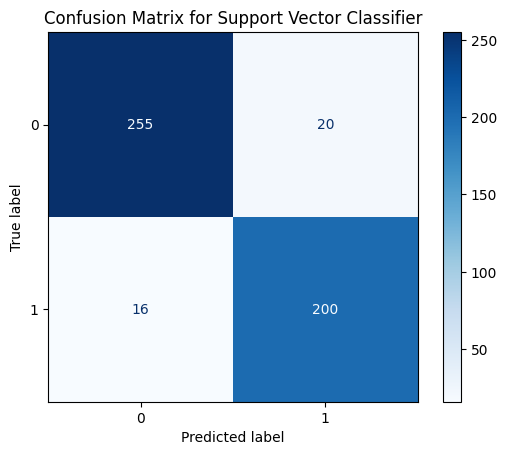

Accuracy of SVC: 0.93
Precision of SVC: 0.91
Recall of SVC: 0.93
F1 Score of SVC: 0.92


In [42]:
# Modeling with Support Vector Machine
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
cm_svc = confusion_matrix(y_test, y_pred_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

# Classification report
print(classification_report(y_test, y_pred_svc))

# Confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# Evaluation metrics
print(f'Accuracy of SVC: {accuracy_svc:.2f}')
print(f'Precision of SVC: {precision_svc:.2f}')
print(f'Recall of SVC: {recall_svc:.2f}')
print(f'F1 Score of SVC: {f1_svc:.2f}')

### Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       275
           1       0.91      0.90      0.90       216

    accuracy                           0.91       491
   macro avg       0.91      0.91      0.91       491
weighted avg       0.91      0.91      0.91       491



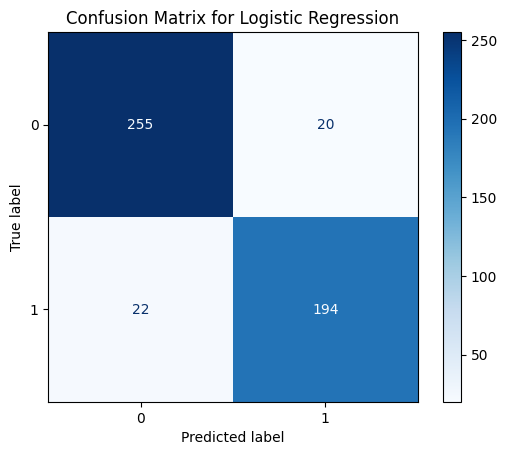

Accuracy of logistic regression : 0.91
Precision of Logistic Regression: 0.91
Recall of Logistic Regression: 0.90
F1 Score of Logistic Regression: 0.90


In [43]:
# Modeling with Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Classification report
print(classification_report(y_test, y_pred_lr))

# Confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Evaluation metrics
print(f'Accuracy of logistic regression : {accuracy_lr:.2f}')
print(f'Precision of Logistic Regression: {precision_lr:.2f}')
print(f'Recall of Logistic Regression: {recall_lr:.2f}')
print(f'F1 Score of Logistic Regression: {f1_lr:.2f}')

### Random Forest

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       275
           1       0.89      0.86      0.88       216

    accuracy                           0.89       491
   macro avg       0.89      0.89      0.89       491
weighted avg       0.89      0.89      0.89       491



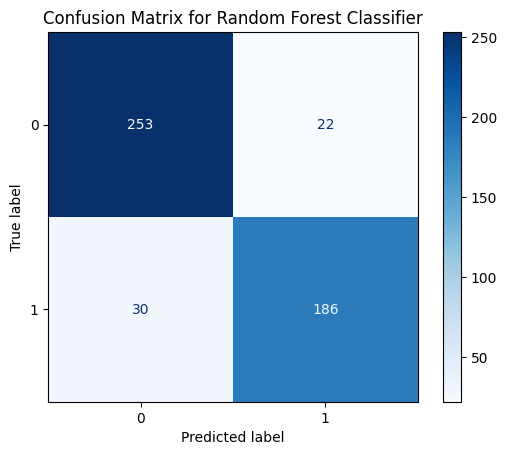

Accuracy of Random Forest: 0.89
Precision of Random Forest: 0.89
Recall of Random Forest: 0.86
F1 Score of Random Forest: 0.88


In [44]:
# Modeling with Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
cm_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Evaluation Metrics
print(f'Accuracy of Random Forest: {accuracy_rf:.2f}')
print(f'Precision of Random Forest: {precision_rf:.2f}')
print(f'Recall of Random Forest: {recall_rf:.2f}')
print(f'F1 Score of Random Forest: {f1_rf:.2f}')

### XGboost

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       275
           1       0.89      0.87      0.88       216

    accuracy                           0.89       491
   macro avg       0.89      0.89      0.89       491
weighted avg       0.89      0.89      0.89       491



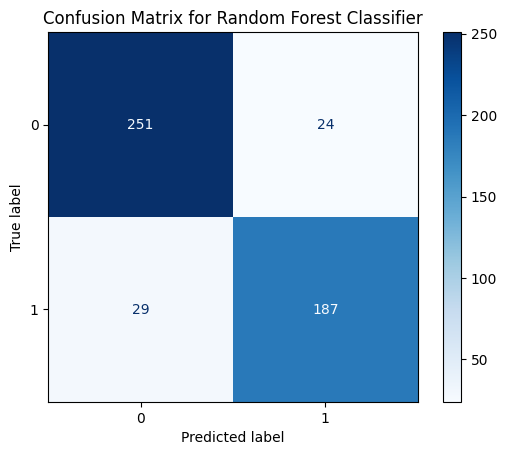

Accuracy of Random Forest: 0.89
Precision of Random Forest: 0.89
Recall of Random Forest: 0.87
F1 Score of Random Forest: 0.88


In [45]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Classification report
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Evaluation Metrics
print(f'Accuracy of Random Forest: {accuracy_xgb:.2f}')
print(f'Precision of Random Forest: {precision_xgb:.2f}')
print(f'Recall of Random Forest: {recall_xgb:.2f}')
print(f'F1 Score of Random Forest: {f1_xgb:.2f}')

### Summary of Model Performance

In [ ]:
# Model Comparison with DataFrame
model_comparison = pd.DataFrame({
    'Model': ['Support Vector Machine', 'Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_svc, accuracy_lr, accuracy_rf, accuracy_xgb],
    'Precision': [precision_svc, precision_lr, precision_rf, precision_xgb],
    'Recall': [recall_svc, recall_lr, recall_rf, recall_xgb],
    'F1 Score': [f1_svc, f1_lr, f1_rf, f1_xgb]
})

# Rounding to 2 decimal places
model_comparison = model_comparison.round(2)
model_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machine,0.93,0.91,0.93,0.92
1,Logistic Regression,0.91,0.91,0.90,0.90
2,Random Forest,0.89,0.89,0.86,0.88
3,XGBoost,0.89,0.89,0.87,0.88


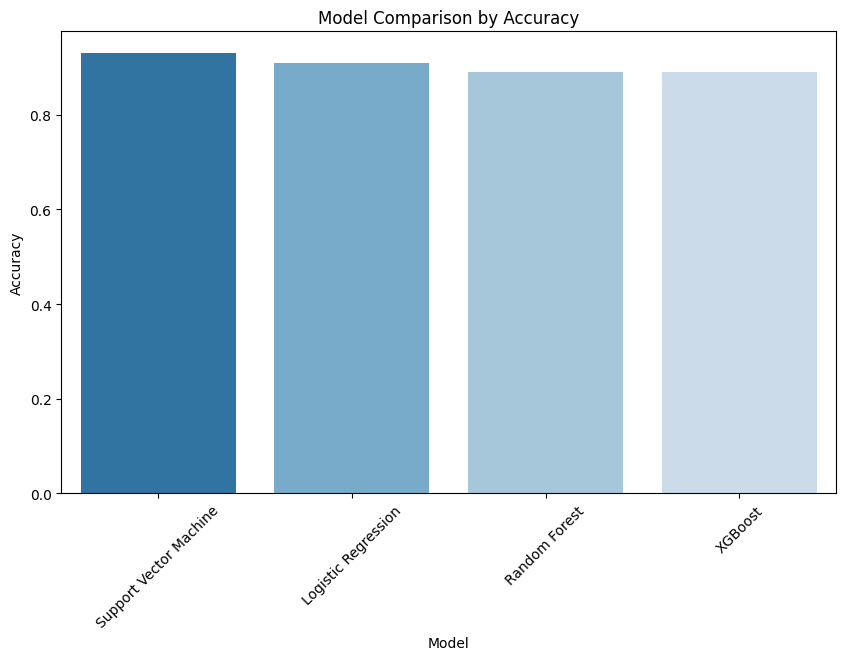

In [50]:
# Comparison Models with Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette=blue_palette)
plt.title('Model Comparison by Accuracy')
plt.xticks(rotation=45)
plt.show()

### Summary of Model Performance

1. Support Vector Machine
    - SVM memberikan performa yang terbaik di semua metrik (0.93)
    - Recall tinggi (0.93) menunjukkan model ini baik dalam mendeteksi kedua kelas (Introvert & Extrovert)
    - F1 Score (0.92) menandakan keseimbangan bagus antara Precision dan Recall.
2. Logistic Regression
    - Performa cukup dekat dengan SVM (Accuracy 0.91, F1 Score 0.90)
3. Random Forest & Xgboost
    - Keduanya sedikit lebih rendah (Accuracy 0.89, F1 Score 0.88).
    - Dataset relatif kecil/sederhana, sehingga ensemble tree belum menunjukkan keunggulannya.


### Test Overfitting for Support Vector Machine

In [49]:
# Check for overfitting for SVC
y_train_pred_svc = svc.predict(X_train_scaled)
accuracy_train_svc = accuracy_score(y_train, y_train_pred_svc)

print(f'\nAccuracy for SVC on Training Set : {accuracy_train_svc:.2f}')
print(f'Accuracy for SVC on Test Set : {accuracy_svc:.2f}')


Accuracy for SVC on Training Set : 0.93
Accuracy for SVC on Test Set : 0.93


## 8. Save The Model

In [36]:
# import joblib

# # Simpan model SVM
# joblib.dump(svc, "SVM_model.pkl")

# # Jika Anda juga menggunakan StandardScaler
# joblib.dump(scaler, "scaler.pkl")